In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller

In [6]:
from scipy.stats.mstats import normaltest

from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline
df = pd.read_csv('data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [8]:
df["AAPL"]=np.log(df["NASDAQ.AAPL"])

In [9]:
df["AAPL"]

0        4.967589
1        4.967728
2        4.967659
3        4.967310
4        4.967449
5        4.968284
6        4.968868
7        4.968493
8        4.968528
9        4.968423
10       4.969049
11       4.969605
12       4.969257
13       4.969979
14       4.970160
15       4.970256
16       4.969952
17       4.969952
18       4.969605
19       4.970022
20       4.969674
21       4.969119
22       4.969188
23       4.969188
24       4.968841
25       4.968841
26       4.969073
27       4.969327
28       4.969466
29       4.968910
           ...   
41236    5.100293
41237    5.100324
41238    5.100781
41239    5.100659
41240    5.100720
41241    5.100750
41242    5.101116
41243    5.101298
41244    5.101633
41245    5.101572
41246    5.101451
41247    5.101471
41248    5.101329
41249    5.101511
41250    5.101085
41251    5.100689
41252    5.100963
41253    5.101268
41254    5.101146
41255    5.100994
41256    5.100842
41257    5.100232
41258    5.101024
41259    5.101085
41260    5

In [14]:
df["difflog_AAPLE"]=df["AAPL"]-df["AAPL"].shift(periods=-1)

In [34]:
import datetime as dt
df["Date"]=df["DATE"].apply(lambda g: datetime.datetime.fromtimestamp(g).isoformat())

In [36]:
type(df["Date"][0])

str

In [16]:
df.head()


,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,AAPL,difflog_AAPLE,Date
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,39.88,82.03,7.36,50.22,63.86,122.000,53.350,4.967589,-0.000139,2017-04-03T19:00:00
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,39.88,82.03,7.38,50.22,63.74,121.770,53.350,4.967728,0.000069,2017-04-03T19:01:00
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,39.98,82.02,7.36,50.12,63.75,121.700,53.365,4.967659,0.000349,2017-04-03T19:02:00
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,39.99,82.02,7.35,50.16,63.88,121.700,53.380,4.967310,-0.000139,2017-04-03T19:03:00
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,39.96,82.03,7.36,50.20,63.91,121.695,53.240,4.967449,-0.000835,2017-04-03T19:04:00


In [17]:
import statsmodels.api as sm
sm.stats.durbin_watson(df["AAPL"])

1.5195875753588083e-08

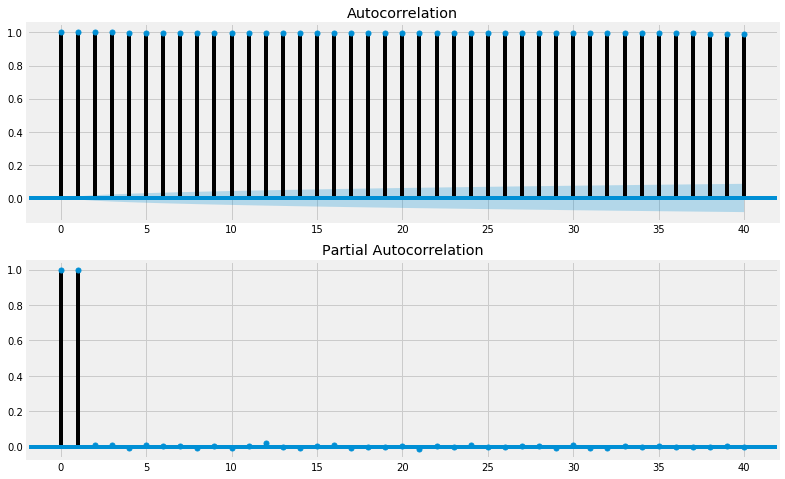

In [18]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["AAPL"].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["AAPL"], lags=40, ax=ax2)

In [19]:
ap_arry=(df["AAPL"].dropna().as_matrix())

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [20]:
ap_arry

array([4.9675886 , 4.96772779, 4.9676589 , ..., 5.0999274 , 5.09913445,
       5.09974447])

In [21]:
model=ARIMA(ap_arry,(2,2,2)).fit()

C:\ProgramData\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [22]:
model.aic

-492354.6827569502

In [32]:
a,b,c=0,0,0
 


In [33]:
for p in range(3):
    for d in range(1,3):
        for q in range(3):
            try:
                model=ARIMA(ap_arry,(p,d,q)).fit()
                if(aic>model.aic):
                    aic=model.aic
                    a,b,c=p,d,q
            except:
                pass
                    
                


C:\ProgramData\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceW

In [25]:
print(a,b,c)

(0, 0, 0)


In [26]:
model=ARIMA(ap_arry,(1,1,2)).fit()
model

In [27]:
model.pre=model.predict()


In [28]:
from sklearn.metrics import mean_squared_error

In [31]:
print(np.sqrt(mean_squared_error(model.pre,df["difflog_AAPLE"][:-1])))

0.0006184063459858885
